# Pymaceuticals Inc.
---

### Analysis

- The mean tumor volume with Capomulin and Ramicane treatments is about 40 mm3. All the other ones are around 52-55 mm3.
- Male and Female mice are about equal, with males slightly higher. More analysis could be done to see if there is a difference in treatment between the gender of the mice.
- Only one treatment has an outlier which is Infubiol, and that is on the lower end.
- It takes around 20 days for the Capomulin treatment to work on mouse l509. After that, the tumor starts growing back, shrinks, and then grows back.
- There is a strong positive correlation between weight and average tumor volume. While greater weight doesn't directly cause greater average tumor volume, it does make sense as there is more room for the tumor to grow.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_data_complete['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = mouse_data_complete[mouse_data_complete["Mouse ID"] == 'g989']
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_complete[mouse_data_complete["Mouse ID"] != 'g989']
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_df['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mouse_summary = pd.concat([clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
                    clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
                    clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
                    clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
                    clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()],axis=1)
mouse_summary.columns.values[[0, 1, 2, 3, 4]] = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance',
                                                 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
mouse_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary_agg = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
mouse_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

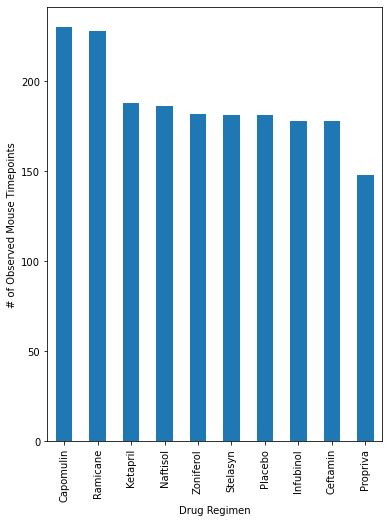

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_type = clean_mouse_df.groupby('Drug Regimen')

count_drug_type = drug_type['Drug Regimen'].count().sort_values(ascending=False)

observed_timepoints = count_drug_type.plot(kind='bar', figsize=(6,8))

observed_timepoints.set_xlabel("Drug Regimen")
observed_timepoints.set_ylabel("# of Observed Mouse Timepoints")

observed_timepoints

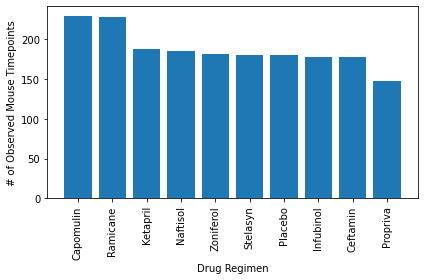

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = list(count_drug_type.keys())
mouse_timepoints = count_drug_type

plt.bar(drug_regimen, mouse_timepoints)

plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')

plt.tight_layout()
plt.show()

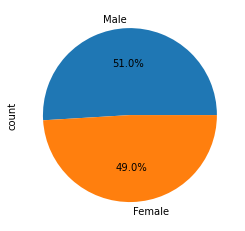

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mouse_df['Sex'].value_counts()
unique_mice = unique_mice.rename('count')

# Make the pie chart
unique_mice_pie = unique_mice.plot(kind='pie', autopct='%1.1f%%')
unique_mice_pie

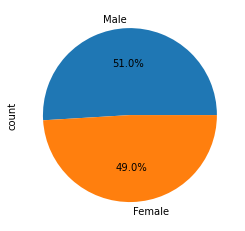

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mouse_df['Sex'].value_counts()
unique_mice = unique_mice.rename('count')

# Make the pie chart
plt.pie(unique_mice, labels=unique_mice.keys(), autopct='%1.1f%%')
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_capomulin_df = clean_mouse_df[clean_mouse_df['Drug Regimen'] == "Capomulin"]
final_tumor_ramicane_df = clean_mouse_df[clean_mouse_df['Drug Regimen'] == "Ramicane"]
final_tumor_infubinol_df = clean_mouse_df[clean_mouse_df['Drug Regimen'] == "Infubinol"]
final_tumor_ceftamin_df = clean_mouse_df[clean_mouse_df['Drug Regimen'] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_mouse_max = final_tumor_capomulin_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
ramicane_mouse_max = final_tumor_ramicane_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
infubinol_mouse_max = final_tumor_infubinol_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
ceftamin_mouse_max = final_tumor_ceftamin_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
mouse_max = pd.concat([capomulin_mouse_max, ramicane_mouse_max, infubinol_mouse_max, ceftamin_mouse_max]).reset_index(drop=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(mouse_max, clean_mouse_df, on=['Mouse ID','Timepoint'], how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    temp_df = final_tumor_df[final_tumor_df['Drug Regimen'] == treatment]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = temp_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # add subset
    tumor_vol_data.append(temp_df['Tumor Volume (mm3)'])

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = []
    
    for mouse_tumor_vol in temp_df['Tumor Volume (mm3)']:
        if mouse_tumor_vol < lower_bound or mouse_tumor_vol > upper_bound:
            outliers.append(mouse_tumor_vol)
    
    print(f'Values under {lower_bound} and {upper_bound} could be outliers for {treatment}. Potential outliers include: {outliers}')

Values under 20.70456164999999 and 51.83201549 could be outliers for Capomulin. Potential outliers include: []
Values under 17.912664470000003 and 54.30681135 could be outliers for Ramicane. Potential outliers include: []
Values under 36.83290494999999 and 82.74144559000001 could be outliers for Infubinol. Potential outliers include: [36.321345799999996]
Values under 25.355449580000002 and 87.66645829999999 could be outliers for Ceftamin. Potential outliers include: []


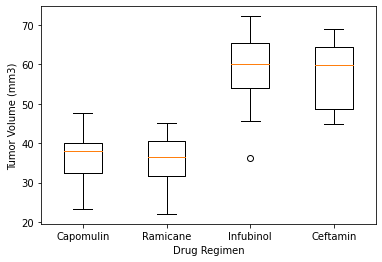

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.boxplot(tumor_vol_data, labels = treatments)
plt.show()

## Line and Scatter Plots

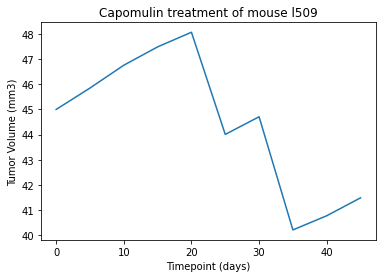

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.plot(final_tumor_capomulin_df[final_tumor_capomulin_df['Mouse ID'] == 'l509']['Timepoint'],
         final_tumor_capomulin_df[final_tumor_capomulin_df['Mouse ID'] == 'l509']['Tumor Volume (mm3)'])
plt.show()

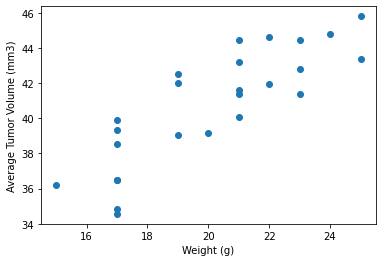

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(final_tumor_capomulin_df.groupby("Mouse ID")['Weight (g)'].mean(),
            final_tumor_capomulin_df.groupby("Mouse ID")['Tumor Volume (mm3)'].mean())
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


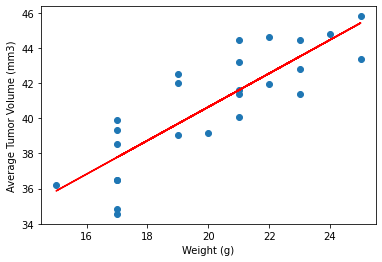

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
x_values = final_tumor_capomulin_df.groupby("Mouse ID")['Weight (g)'].mean()
y_values = final_tumor_capomulin_df.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()